In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import sys
sys.path.append('../')
from pointnet.sh import calc_sh,lm2flat_index

In [2]:
l_max = 10
res = 128
x = torch.linspace(0, 1, res)
grid = torch.dstack(torch.meshgrid((1-x)*torch.pi,x*2*torch.pi,indexing="ij")).flatten(0,1)
Y =calc_sh(l_max,grid)

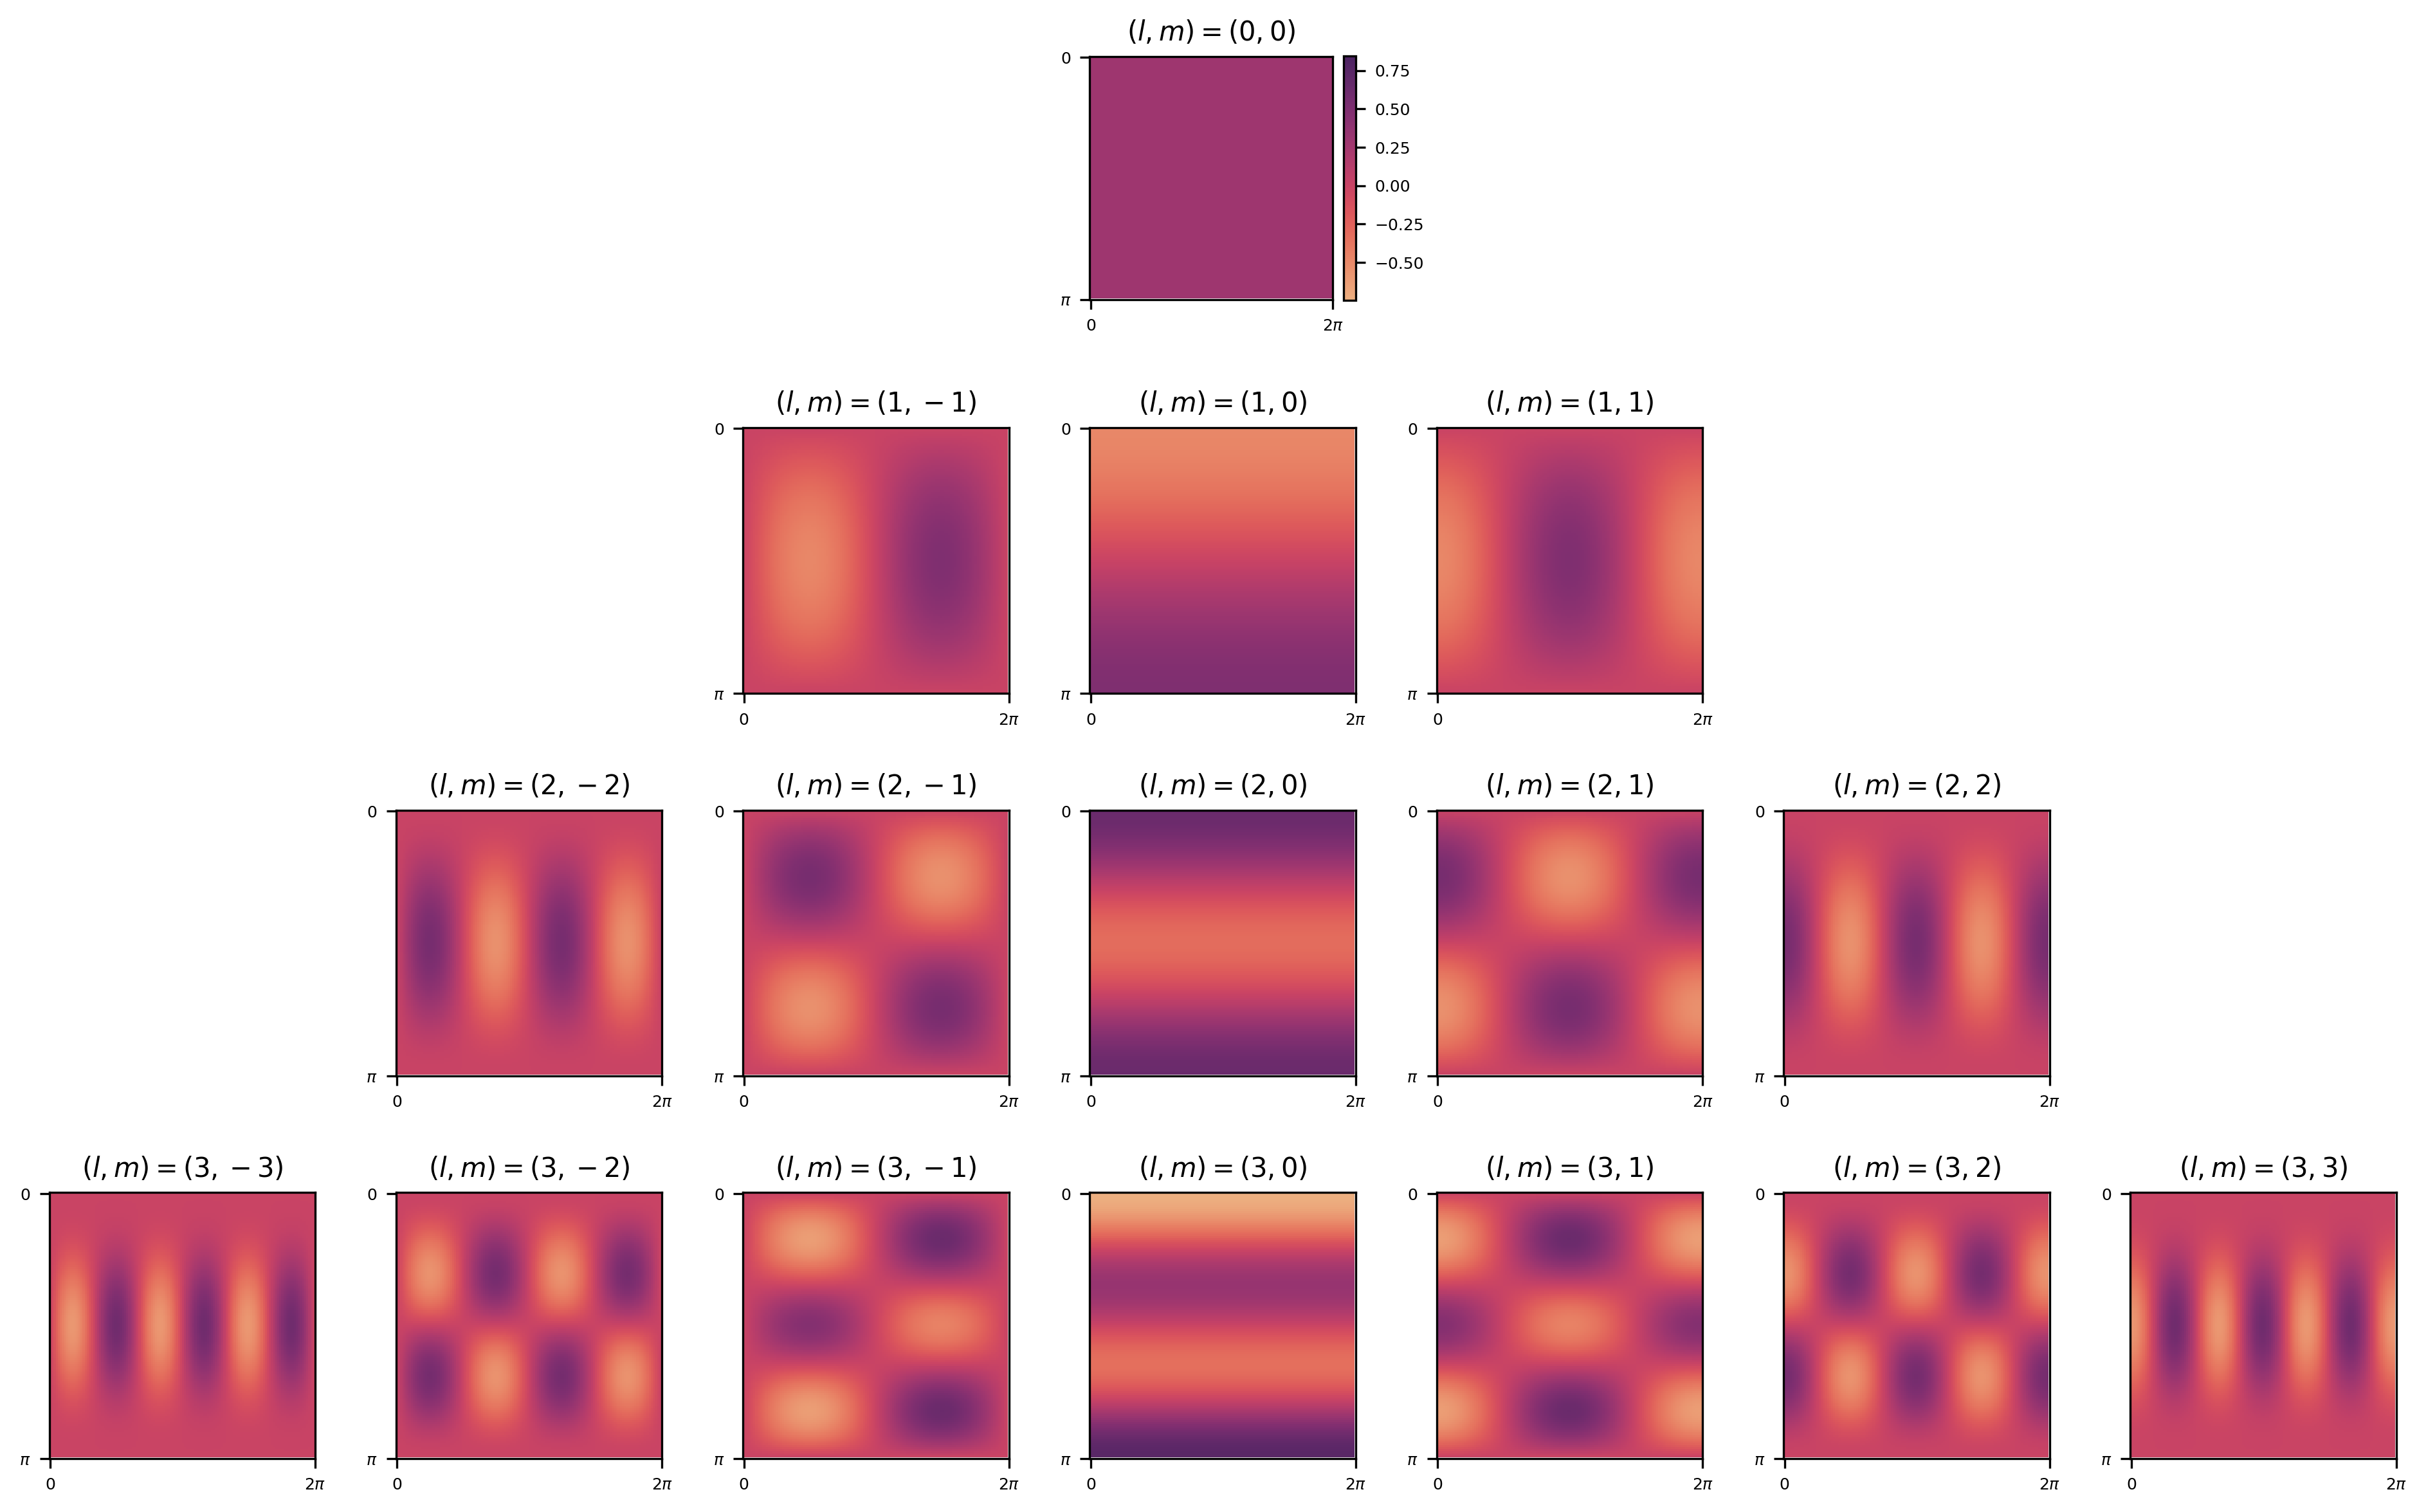

In [33]:
lmax = 4
fig = plt.figure(figsize=(lmax*4,lmax*2),dpi=300)
plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=6) #fontsize of the x tick labels
plt.rc('ytick', labelsize=6) #fontsize of the y tick labels

vmin = Y[:,:lm2flat_index(lmax,lmax)].min()
vmax = Y[:,:lm2flat_index(lmax,lmax)].max()
for l in range(lmax):
    for m in range(-l,l+1):
        i = (2*lmax+1)*l+lmax+m
        ax = fig.add_subplot(lmax,2*lmax+1,i+1)
        c = ax.imshow(Y[:,lm2flat_index(l,m)].reshape(res,res),vmin=vmin,vmax=vmax,cmap="flare")
        if l==0:
            plt.colorbar(c,ax=ax,fraction=0.046, pad=0.04)
        #ax.grid(False)
        ax.set_yticks([0,res],["0","$\pi$"])
        ax.set_xticks([0,res],["0","$2\pi$"])
        ax.set_title(f"$(l,m)=({l},{m})$")

plt.tight_layout()
fig.savefig("sh_polar_plots.pdf",pad_inches=0,bbox_inches="tight")

In [ ]:
Y.shape

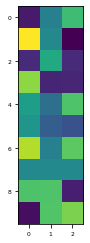

In [16]:
import seaborn
plt.imshow(seaborn.color_palette())